In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fmendesdat263xdemos/exercise.csv
/kaggle/input/fmendesdat263xdemos/calories.csv


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
exc = pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')
exc

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [72]:
cal = pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')
cal

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [73]:
cal['Calories']

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [74]:
data = exc.join(cal['Calories'])
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [75]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [76]:
data.keys()

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [77]:
data.drop(columns='User_ID',inplace=True)
data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [79]:
data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [80]:
data.duplicated().sum()

1

In [81]:
#removing duplicates
data = data.drop_duplicates(keep='first')
data

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [82]:
data.duplicated().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

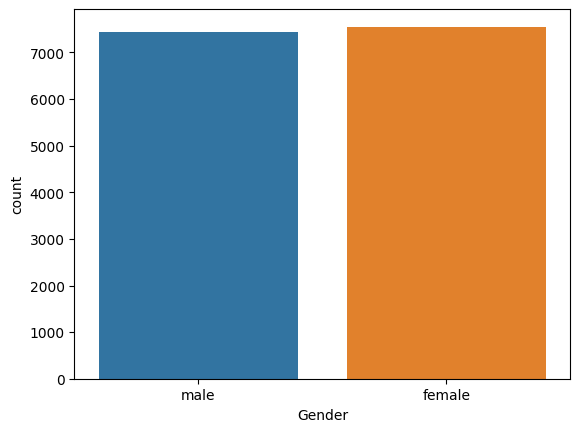

In [83]:
sns.countplot(data,x='Gender')

<Axes: xlabel='Age', ylabel='Calories'>

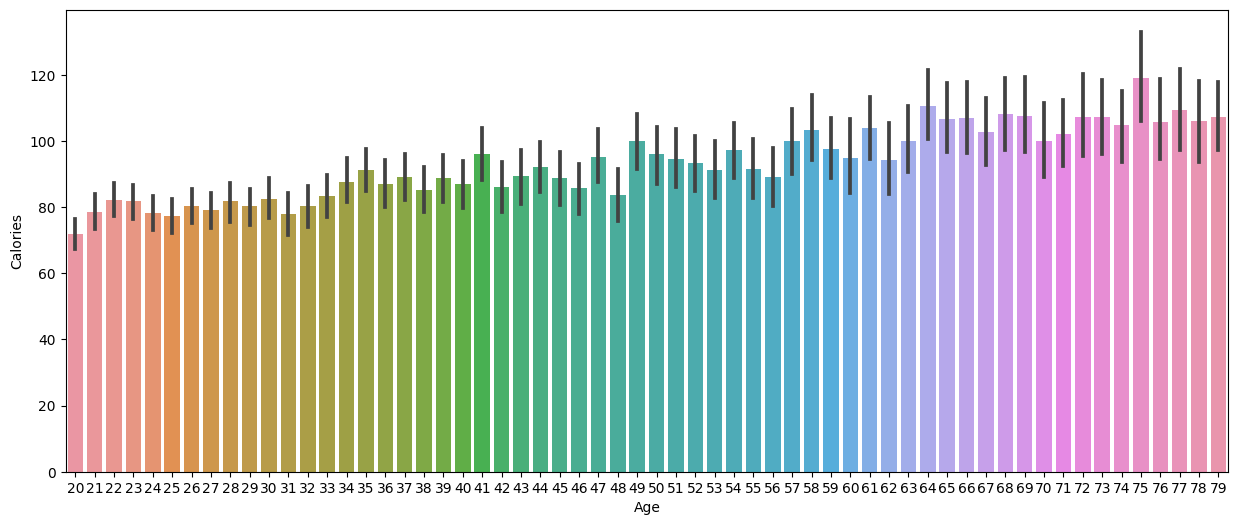

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(data,x='Age',y='Calories')

<Axes: xlabel='Height', ylabel='Calories'>

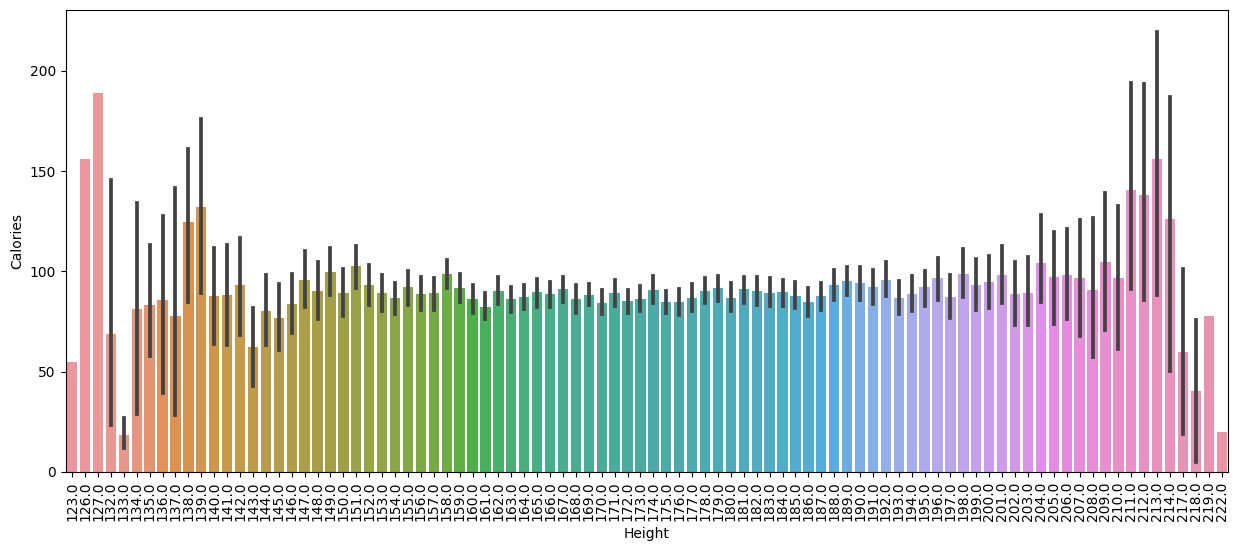

In [90]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(data,x='Height',y='Calories')

<Axes: xlabel='Weight', ylabel='Calories'>

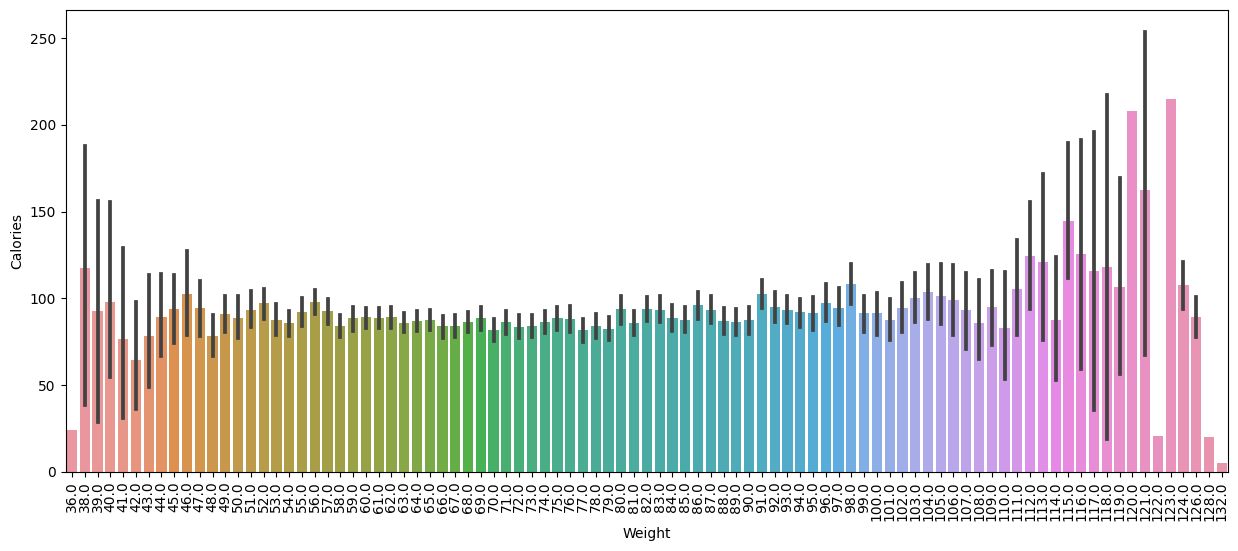

In [92]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(data,x='Weight',y='Calories')

<Axes: xlabel='Heart_Rate', ylabel='Calories'>

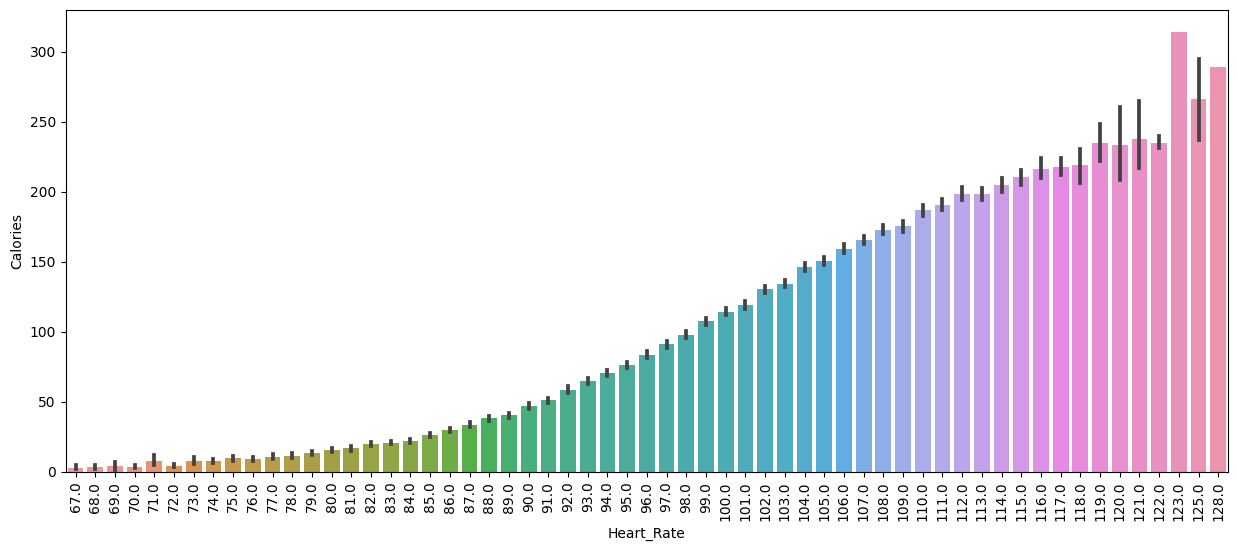

In [103]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(data,x='Heart_Rate',y='Calories')

<Axes: xlabel='Duration', ylabel='Calories'>

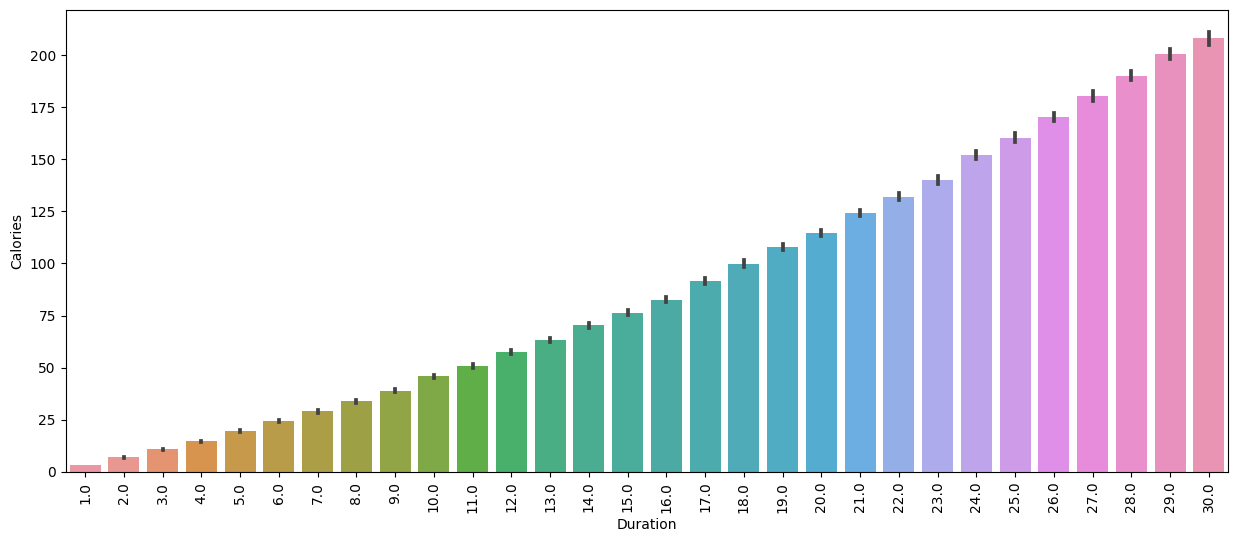

In [104]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(data,x='Duration',y='Calories')

<Axes: xlabel='Body_Temp', ylabel='Calories'>

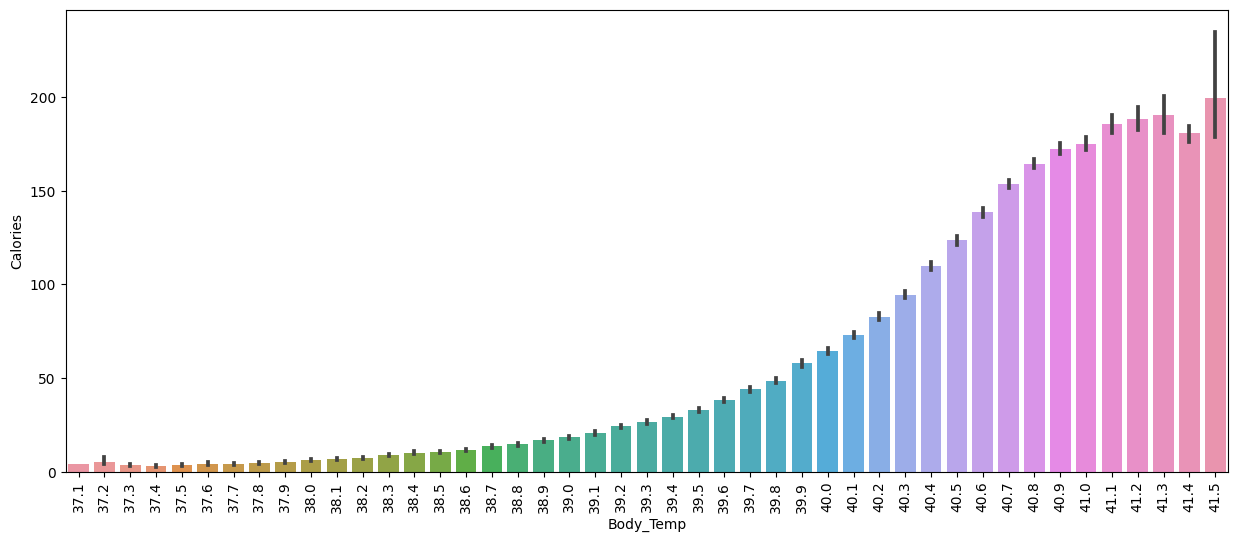

In [105]:
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
sns.barplot(data,x='Body_Temp',y='Calories')

/tmp/ipykernel_35/1355884667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],color='red')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

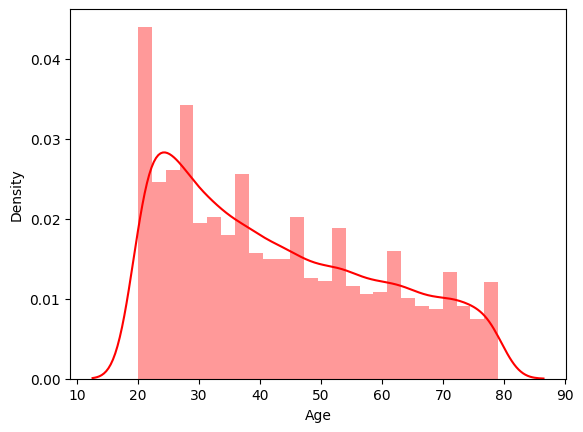

In [98]:
sns.distplot(data['Age'],color='red')

/tmp/ipykernel_35/3139301615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'],color='green')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

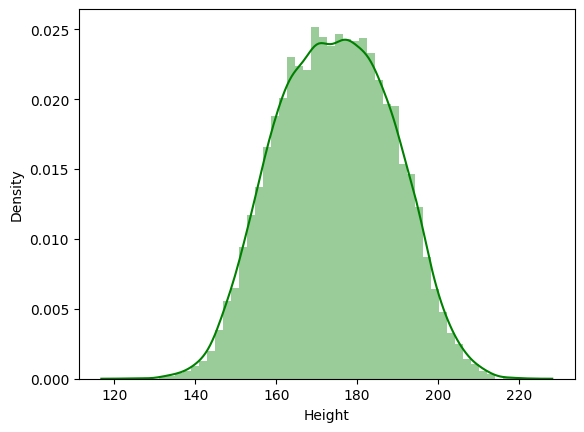

In [99]:
sns.distplot(data['Height'],color='green')

/tmp/ipykernel_35/2799343561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

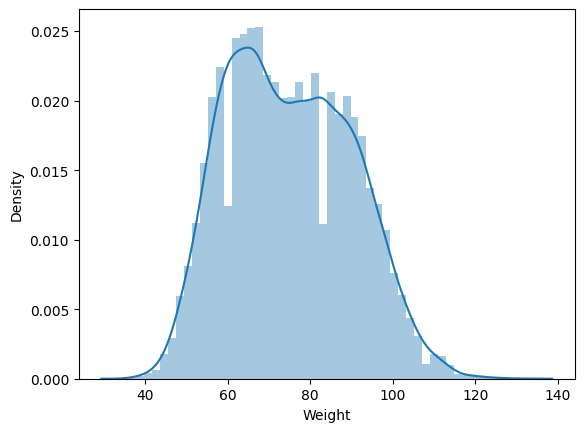

In [97]:
sns.distplot(data['Weight'])

/tmp/ipykernel_35/3351730661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Heart_Rate'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Heart_Rate', ylabel='Density'>

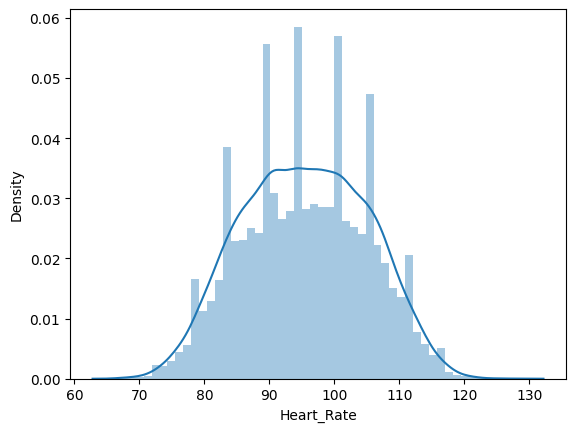

In [101]:
sns.distplot(data['Heart_Rate'])

/tmp/ipykernel_35/4100502744.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Body_Temp'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Body_Temp', ylabel='Density'>

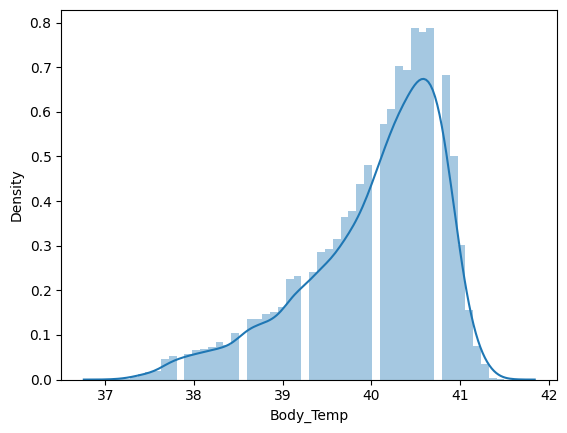

In [102]:
sns.distplot(data['Body_Temp'])

In [84]:
#LabelEncoding the Gender  Male=1 Female=0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data

/tmp/ipykernel_35/3442981320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = encoder.fit_transform(data['Gender'])


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


<Axes: >

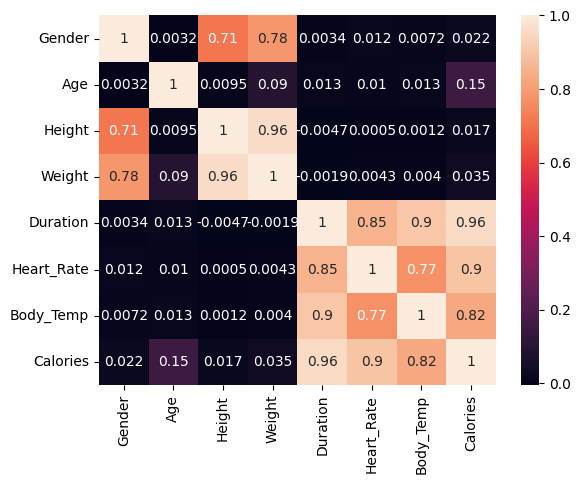

In [85]:
sns.heatmap(data.corr(),annot=True)

## TRAINING

In [106]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [107]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [109]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [110]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 14999, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [113]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14481,1,40,183.0,81.0,8.0,85.0,40.0
1934,1,58,172.0,77.0,6.0,80.0,39.3
7900,0,22,163.0,60.0,12.0,86.0,39.5
2952,1,70,180.0,77.0,9.0,100.0,40.0
4367,0,22,167.0,64.0,13.0,93.0,39.8
...,...,...,...,...,...,...,...
5191,0,75,148.0,51.0,22.0,104.0,40.6
13419,0,49,159.0,59.0,12.0,100.0,40.4
5390,1,57,189.0,92.0,8.0,90.0,39.5
860,1,35,174.0,76.0,12.0,97.0,40.2


In [114]:
Y_train

14481     27.0
1934      20.0
7900      47.0
2952      63.0
4367      59.0
         ...  
5191     151.0
13419     70.0
5390      41.0
860       57.0
7270      59.0
Name: Calories, Length: 11249, dtype: float64

In [117]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation

In [118]:
y_pred = regressor.predict(X_test)
y_pred

array([206.09885 , 224.69226 ,   6.211642, ..., 102.80089 , 163.74524 ,
        40.635296], dtype=float32)

In [120]:
Y_test

6723     203.0
6473     223.0
4679       6.0
862      161.0
7286      86.0
         ...  
10371     97.0
12541    132.0
2656     101.0
6759     166.0
13565     41.0
Name: Calories, Length: 3750, dtype: float64

In [123]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_pred,Y_test)
print("Mean Absolute Error:", error)

Mean Absolute Error: 1.4695867061456045


In [125]:
from sklearn.ensemble import GradientBoostingRegressor
reg2 = GradientBoostingRegressor()
reg2.fit(X_train,Y_train)

GradientBoostingRegressor()

In [128]:
y_pred2 = reg2.predict(X_test)

In [129]:
from sklearn.metrics import mean_absolute_error
error2 = mean_absolute_error(y_pred2,Y_test)
print("Mean Absolute Error:", error2)

Mean Absolute Error: 2.701081277269616


In [130]:
from sklearn.ensemble import AdaBoostRegressor
reg3 = AdaBoostRegressor()
reg3.fit(X_train,Y_train)

AdaBoostRegressor()

In [131]:
y_pred3 = reg3.predict(X_test)

In [132]:
from sklearn.metrics import mean_absolute_error
error3 = mean_absolute_error(y_pred3,Y_test)
print("Mean Absolute Error:", error3)

Mean Absolute Error: 8.84122893705519


In [133]:
import pickle
pickle.dump(regressor, open('xgbregressor.pkl','wb'))